### Quality
1. There are features with extremely high missing values in are 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'. These columns have above 92% missing values twitter-archive-enhanced data set.
- Also The column 'expanded_urls' has 2.50% missing values in twitter-archive-enhanced data set

2. The text column contain  multiple variables such as texts, numbers and url links within each single row in twitter-archive-enhanced data set

3. we can also see that the name column in twitter-archive-enhanced data set has object name 'None' (this is could be missing value which have been replace with a value None) thus they will not appear as missing but as object.

4. We can see text column has mixed lower and upper case, while other rows have upper case only and others lower case only in the twitter-archive-enhanced data set.

5. Special characters (punctuation) are also dominant in text column of twitter-archive-enhanced data set.

6. The data type for Timestamp column in twitter-archive-enhanced dataset appears as object instead of datetime dtype

7. The data type of tweet_id is integer and should be object in twitter-archive-enhanced dataset.

8.  We can see the types of dogs such as 'doggo', 'floofer', 'pupper', 'puppo' have more 'None' values implying they have many missing values in twitter-archive-enhanced dataset
9. The name column contain some uncommon values (dog names) such as a , an which neeed to be investigated well(since they might be parts of strings from elsewhere) in twitter-archive-enhanced dataset
10. The source column is a bit dirty with HTML format with a and \a tags surrounding the text (should be cleaned to be more readable)
11. retweeted_status_timestamp column in twitter_archive dataset depicts that the there 181 retweets which may not be neccessary for analysing dogs images

### Tidiness
1. Since 'doggo', 'floofer', 'pupper', 'puppo' columns are  dogs stage they should in a same column name (one variable) and not separate  columns
2. Since the image_predictions dataset has  common column (tweet_id) with twitter_archive dataset thus the two tables need to be merged


# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The features in the data set cinclude :
id,  imdb_id,  popularity,  budget,  revenue,  original_title, cast, homepage,  director,  tagline,  keywords,  overview,  runtime,  genres,  production_companies,  release_date, vote_count,  vote_average,  release_year,  budget_adj, revenue_adj 


## Example of Data Analysis Questions

#### Question one: Which genres are most popular from year to year? 
Identify movies which are most popular (higly rated movies) from year to year

#### Question one: What kinds of properties are associated with movies that have high revenues? 
Identifying correlates that influence (correlated/ related with) revenues

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Loading the dataset

In [18]:
df=pd.read_csv('tmdb-movies.csv')

#### Vieing and exploring the dataset

In [19]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


##### Viewing number of rows, columns and datatypes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [21]:
df.shape

(10866, 21)

The dataset contain 10866 rows and 21 columns, the number of rows for each column are not uniform showing that there could be missing values.


Some features are continous (float), discrete (integers) (numeric variables) while others are string (objects)

## Data Wrangling


### Checking Data Quality issues and Data Cleaning


#### Checking and Handling Missing Vlues

In [22]:
def missings_(df):
    miss      = df.isnull().sum()
    miss_pct  = 100 * df.isnull().sum()/len(df)
    
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missings_cols = miss_pct.rename(columns = {0:'Missings values', 1: 'Missing percentage'})
    missings_cols = missings_cols[missings_cols.iloc[:,1]!=0].sort_values('Missing percentage', ascending = False).round(2)
    
    return missings_cols  

missings = missings_(df)
missings

,Missings values,Missing percentage
homepage,7930,72.98
tagline,2824,25.99
keywords,1493,13.74
production_companies,1030,9.48
cast,76,0.70
director,44,0.40
genres,23,0.21
imdb_id,10,0.09
overview,4,0.04


The variables with missing values are homepage', 'tagline', 'keywords', 'production_companies', 'cast,director,genres,imdb_id,overview. However homepage has the highest missing value of about 73% thus feature should be dropped moreover the feature is not much useful to movie rating or revenue. 

The missing values other features are below 30% and may be imputed with either mode or median however tagline and keyword may not be useful and may be eliminated to make the data more streamlined and focused

In [23]:
#make a copy of dataframe
dfc=df.copy()

 #### Droping homepage column with 72.98% missing values

In [24]:
dfc.drop('homepage', axis=1, inplace=True)

### Imputing missing values for string (object) whose percentage is less than 30% with mode

Mode is better approach to impute missing values for categorical variables or strings (objects)
Although a number of columns will be dropped since they are not useful in our analysis will just impute first with mode

In [25]:
dfc[['tagline', 'keywords', 'production_companies', 'cast',
       'director', 'genres', 'imdb_id', 'overview']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tagline               8042 non-null   object
 1   keywords              9373 non-null   object
 2   production_companies  9836 non-null   object
 3   cast                  10790 non-null  object
 4   director              10822 non-null  object
 5   genres                10843 non-null  object
 6   imdb_id               10856 non-null  object
 7   overview              10862 non-null  object
dtypes: object(8)
memory usage: 679.2+ KB


In [26]:
dfc.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [27]:
lc=['tagline', 'keywords', 'production_companies', 'cast',
       'director', 'genres', 'imdb_id', 'overview']
dfc[lc]=dfc[lc].fillna(dfc[lc].mode().iloc[0])
dfc.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Handling the duplicates

Now that we dont have missing values in the data we can check the duplicates and drop if they exist

before dealing with nan values, lets check duplicates and remove them

In [28]:
dfc.duplicated().sum()

1

In [29]:
dfc[dfc.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**We can try to doublecheck presence of identical rows**

In [30]:
dfc[dfc.id==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


##### Dropr the dupicates

In [31]:
dfc.drop_duplicates(inplace=True)

lets see how many null values 

### Remove the unnecessary Features from the dataset
The unnecessary columns will be removed from  dataset.

It's important to  delete columns they will not be used in analysis

In [33]:
dfc.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [34]:
dfc.overview.value_counts()

No overview found.                                                                                                                                                                                                                                                                                 17
Wilbur the pig is scared of the end of the season, because he knows that come that time, he will end up on the dinner table. He hatches a plan with Charlotte, a spider that lives in his pen, to ensure that this will never happen.                                                               2
1960. The thrilling battles waged by a band of kids from two rival villages in the southern French countryside.                                                                                                                                                                                     2
Zenon Kar a teenager living on a space station in the year 2054 competes in the first ever Galactic Teen Supreme conte

In [35]:

# this column will not be neccessary for my analysis
dfc.drop(['id','overview', 'keywords', 'tagline', 'imdb_id'], axis=1, inplace=True)

### Checking the Inconsistencies

● Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [36]:
dfc.genres.value_counts()

Comedy                                      735
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [37]:
dfc.cast.value_counts()

Louis C.K.                                                                        82
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei            5
Bill Burr                                                                          4
Pierre Coffin                                                                      3
Chris Wedge                                                                        3
                                                                                  ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini     1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                   1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                   1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser          1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson           1
Name: cast, Length: 10719, dtype: int64

It is evident that features such as ‘cast’and ‘genres’, contain multiple values separated by pipe (|) characters.

We're going to take each hybrid row and split them into new rows - one with values for the first genres amd cast type (values before the "|"), and the other with values for the second genres amd cast type (values after the "|"). 

In [38]:
dfc.shape

(10865, 15)

In [39]:
ds = dfc[dfc['genres'].str.contains('|')]
ds[['genres','cast']].head()

,genres,cast
0,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,Action|Adventure|Science Fiction|Thriller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,Adventure|Science Fiction|Thriller,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...


In [40]:
ds.shape

(10865, 15)

    This means all the rows in genres column contains |

In [41]:
ds.cast.value_counts()

Louis C.K.                                                                        82
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei            5
Bill Burr                                                                          4
Pierre Coffin                                                                      3
Chris Wedge                                                                        3
                                                                                  ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini     1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                   1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                   1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser          1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson           1
Name: cast, Length: 10719, dtype: int64

In [42]:
for s in ds.select_dtypes(include='object').columns:
    print(ds[s][ds[s].str.contains('|')].unique())

['Jurassic World' 'Mad Max: Fury Road' 'Insurgent' ...
 'Beregis Avtomobilya' "What's Up, Tiger Lily?" 'Manos: The Hands of Fate']
["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"
 'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman'
 'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller' ...
 'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya'
 'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru'
 'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson']
['Colin Trevorrow' 'George Miller' 'Robert Schwentke' ... 'Alan Rafkin'
 'Bruce Brown' 'Harold P. Warren']
['Action|Adventure|Science Fiction|Thriller'
 'Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Fantasy' ...
 'Adventure|Drama|Action|Family|Foreign' 'Comedy|Family|Mystery|Romance'
 'Mystery|Science Fiction|Thriller|Drama']
['Universal Studios|Amblin Entertainment|Leg

In [43]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10865 non-null  object 
 8   production_companies  10865 non-null  object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

In [46]:
#since we have multiple questions answers being similar in logic and code, we will give function which will make our life easier

#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = dfc[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [47]:
split_cols=['genres','cast','production_companies']

In [48]:
def explode_values(df,col):
    """ This Function Take dataframe 'df' and column 'col' with multiple values and return exploded dataframe"""
    # split column values into lists
    df[col] = df[col].str.split('|')
    # return exploded dataframe
    return df.explode(col, ignore_index=True)

In [49]:
# explode 'genre' values 
movie_df = explode_values(dfc, 'genres')

The genres feature has been exploded, similar apprach can be applied to cast column

In [50]:
movie_df.shape

(26978, 15)

In [51]:
movie_df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Parsing Date
The release_date columns appears as string yet it should be in datetime hence should be converted to datetime

In [68]:
dfc['release_date']=pd.DatetimeIndex(dfc['release_date'])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10865 non-null  object        
 5   director              10865 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10865 non-null  object        
 8   production_companies  10865 non-null  object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

Since the dataset has been cleaned the next step is to explore the dataset

## Exploratory Data Analysis
Exploratory data analysis is a technique used to understand and summarize the characteristics of a dataset. 

It is an Imperative step in the data analysis process since it aid in identifying patterns, trends, and relationships in the data that can be used to inform subsequent analysis. 

It involves visualizing the data using graphs and plots, as well as summarizing the main characteristics of the data

#### Checking the correlation  and multicollinearity 

In [52]:
corr = movie_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.541850,0.665842,0.142636,0.794904,0.232962,0.109962,0.507593,0.610355
budget,0.541850,1.000000,0.729464,0.201225,0.641793,0.100735,0.147667,0.968086,0.620325
revenue,0.665842,0.729464,1.000000,0.171713,0.798671,0.194966,0.081055,0.700055,0.920886
runtime,0.142636,0.201225,0.171713,1.000000,0.174389,0.158019,-0.134953,0.235356,0.187006
vote_count,0.794904,0.641793,0.798671,0.174389,1.000000,0.278908,0.131224,0.594014,0.715034
vote_average,0.232962,0.100735,0.194966,0.158019,0.278908,1.000000,-0.124385,0.113723,0.216350
release_year,0.109962,0.147667,0.081055,-0.134953,0.131224,-0.124385,1.000000,0.042380,-0.047509
budget_adj,0.507593,0.968086,0.700055,0.235356,0.594014,0.113723,0.042380,1.000000,0.643551
revenue_adj,0.610355,0.620325,0.920886,0.187006,0.715034,0.216350,-0.047509,0.643551,1.000000


#### Multicollinearity
Multicollinearity is a statistical phenomenon in which two or more predictor variables in a multiple regression model are highly correlated. 

This can lead to unstable and unpredictable model coefficients, and can make it difficult to interpret the results of the model.

It is evident that theere is high multicollinearity between budget_adj vs budget (0.96) and revenue_adj vs revunue (0.92) therefore we can drop revenue and budget.

#### Droping unadjusted revenues
Since budget_adj and revenue_adj are adjusted budget and revunue respectively to capture inflation  over time we may used them  and this back up our reason even more drop unadjusted budget and revunue 

(We can as well add a profit column that is equal to revenuee minus budget though not neccessary at momment

movie_df['profit']=movie_df['revenue']-movie_df['budget']) 

In [53]:
movie_df.drop(['budget','revenue'], axis=1, inplace=True)

In [56]:
movie_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26978.000000,26978.000000,26978.000000,26978.000000,26978.000000,2.697800e+04,2.697800e+04
mean,0.705653,102.773000,249.801579,5.956932,2000.701794,2.102152e+07,6.083795e+07
std,1.114621,30.411297,637.784544,0.912318,12.764426,3.818896e+07,1.614714e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.224439,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.410850,99.000000,44.000000,6.000000,2005.000000,1.039001e+02,0.000000e+00
75%,0.774231,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.359754e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that there is high disparity in some features such as djusted budget and revenue, vote_count and runtime

There are some strange values where movie runtime is 0 and yet the Maximum  runtime is 900 minutes. 

Thre are movies whose adjusted budget and revenue is 0 

#### Investigating movies whose runtime is equal to zero 

In [61]:
movie_df[movie_df['runtime']==0]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
256,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0
257,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Action,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0
258,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0
803,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.0,0.0
961,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,Paramount Pictures,2015-01-01,15,5.6,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15704,0.006440,Quatre Ã©toiles,JosÃ© Garcia|Isabelle CarrÃ©|RenÃ©e Le Calm|Fr...,Christian Vincent,0,Comedy,Paramount Pictures,2005-01-01,15,5.9,2005,0.0,0.0
16694,0.071872,Jean-Philippe,Fabrice Luchini|Johnny Hallyday|Jackie Berroye...,Laurent Tuel,0,Comedy,FidÃ©litÃ© Productions|StudioCanal|TF1 Films P...,2006-04-05,26,5.6,2006,0.0,0.0
21740,0.069903,Mission Kashmir,Sanjay Dutt|Hrithik Roshan|Preity Zinta|Jackie...,Vidhu Vinod Chopra,0,Action,Paramount Pictures,2000-10-27,10,5.7,2000,0.0,0.0
21741,0.069903,Mission Kashmir,Sanjay Dutt|Hrithik Roshan|Preity Zinta|Jackie...,Vidhu Vinod Chopra,0,Drama,Paramount Pictures,2000-10-27,10,5.7,2000,0.0,0.0


In [62]:
movie_df.query('runtime==0').count()

popularity              62
original_title          62
cast                    62
director                62
runtime                 62
genres                  62
production_companies    62
release_date            62
vote_count              62
vote_average            62
release_year            62
budget_adj              62
revenue_adj             62
dtype: int64

#### Droping movies whose runtime is equal to zero 
It may not be informative to have movies whose runtime is zero also most of such movies their buget and zero revunues is zero as well, thus will consider drop them out

In [64]:
movie_df.drop(movie_df[movie_df.runtime==0].index, inplace=True)
movie_df.query('runtime==0').count().sum()

0

In [65]:
movie_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26916.000000,26916.000000,26916.000000,26916.000000,26916.000000,2.691600e+04,2.691600e+04
mean,0.706791,103.009734,250.333445,5.958021,2000.678333,2.106917e+07,6.097809e+07
std,1.115493,30.043147,638.422052,0.912031,12.767995,3.821996e+07,1.616308e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.225197,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.411816,100.000000,44.000000,6.000000,2005.000000,7.020250e+02,0.000000e+00
75%,0.776305,112.000000,174.000000,6.600000,2011.000000,2.709274e+07,4.389831e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Question one: Which genres are most popular from year to year?
Identify movies which are most popular (higly rated movies) from year to year

In [96]:
# check movies genres popularity over years
# year to year best genres from 2000 to 2015
sorted_genres = movie_df[["release_year","popularity" ,"genres"]].sort_values(["release_year","popularity","genres"], ascending = False)
each_year_sorted_genres = pd.DataFrame(sorted_genres.groupby(["release_year"]).genres.max())
each_year_sorted_genres.tail(16)

,genres
release_year,
2000,Western
2001,Western
2002,Western
2003,Western
2004,Western
2005,Western
2006,Western
2007,Western
2008,Western


In [78]:
movie_df.groupby("genres").popularity.median().sort_values(ascending=False)

genres
Adventure          0.560689
Fantasy            0.529881
Animation          0.501163
Crime              0.476687
Family             0.471104
Action             0.469825
Thriller           0.444439
Science Fiction    0.440049
War                0.432470
Mystery            0.428949
History            0.412770
Romance            0.405537
Drama              0.389778
Comedy             0.387712
Western            0.328263
Music              0.323933
Horror             0.322620
TV Movie           0.233227
Foreign            0.166284
Documentary        0.142518
Name: popularity, dtype: float64

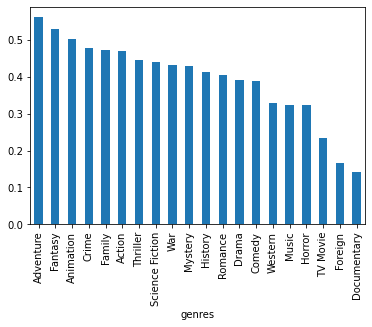

In [80]:
movie_df.groupby("genres").popularity.median().sort_values(ascending=False).plot(kind="bar");

<AxesSubplot:xlabel='genres', ylabel='popularity'>

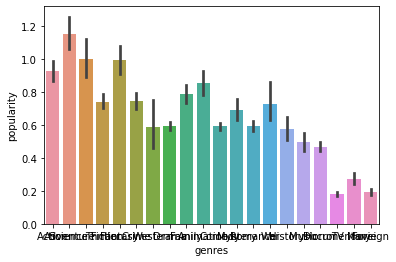

In [81]:
sns.barplot(x="genres", y="popularity", data=movie_df);

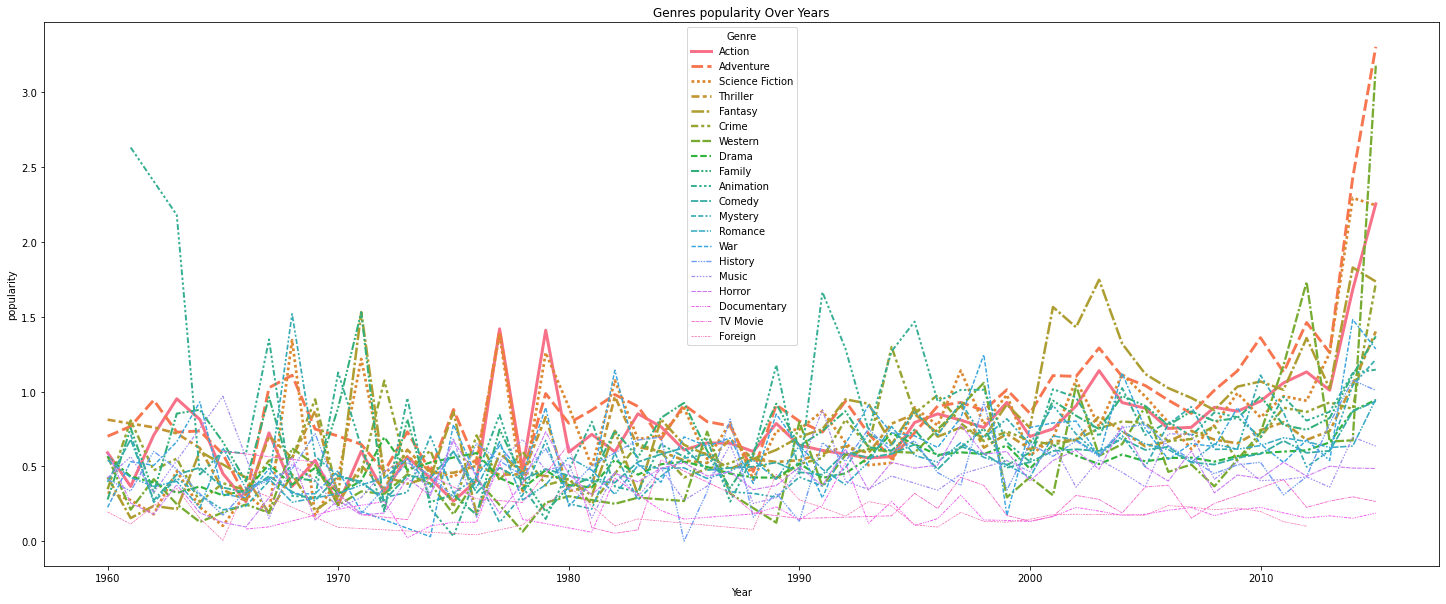

In [84]:
plt.figure(figsize=(25,10))
sns.lineplot(x='release_year', y='popularity', data=movie_df, hue='genres', style='genres', size='genres', ci=None)
plt.legend(title='Genre')
plt.title("Genres popularity Over Years")
plt.xlabel("Year")
plt.ylabel("popularity")
plt.show()

In [103]:
movie_df.groupby(['release_year', 'genres'])['popularity'].median().head(40)

release_year  genres         
1960          Action             0.288758
              Adventure          0.465879
              Comedy             0.307729
              Crime              0.346479
              Drama              0.271858
              Family             0.254124
              Fantasy            0.428247
              Foreign            0.194948
              History            0.256779
              Horror             0.323180
              Music              0.423531
              Romance            0.551315
              Science Fiction    0.144106
              Thriller           0.496477
              War                0.225863
              Western            0.289913
1961          Action             0.307820
              Adventure          0.473274
              Animation          2.631987
              Comedy             0.297034
              Crime              0.806519
              Drama              0.286475
              Family             0.303783
    

In [100]:
movie_df.groupby(['release_year', 'genres'])['popularity'].median().tail(60)

release_year  genres         
2012          Thriller           0.419030
              War                0.574793
              Western            0.390865
2013          Action             0.534902
              Adventure          0.661187
              Animation          0.467773
              Comedy             0.349655
              Crime              0.732866
              Documentary        0.141918
              Drama              0.422634
              Family             0.463994
              Fantasy            0.470131
              History            0.423209
              Horror             0.291471
              Music              0.288878
              Mystery            0.355905
              Romance            0.393664
              Science Fiction    0.471044
              TV Movie           0.176388
              Thriller           0.474132
              War                0.249031
              Western            0.393664
2014          Action             0.560295
    

At around 1960s Romance and Animation was popular movies however their pooularity decline as adventure, action and western movies gain popularity . By 2015 the most popular movies are Adventure, Crime, Western and Action

### Question one: What kinds of properties are associated with movies that have high revenues?
Identifying correlates that influence (correlated/ related with) revenues

#### Renaming columns ending with adj
First let rename adjusted budgets and revenues

In [105]:
movie_df.rename({'budget_adj':'budget', 'revenue_adj':'revenue'}, axis=1, inplace=True)


In [106]:
corr = movie_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
popularity,1.000000,0.141105,0.794947,0.232899,0.110858,0.507398,0.610295
runtime,0.141105,1.000000,0.173899,0.156277,-0.130583,0.234320,0.186574
vote_count,0.794947,0.173899,1.000000,0.278918,0.132023,0.593853,0.714945
vote_average,0.232899,0.156277,0.278918,1.000000,-0.123443,0.113301,0.216252
release_year,0.110858,-0.130583,0.132023,-0.123443,1.000000,0.043433,-0.046865
budget,0.507398,0.234320,0.593853,0.113301,0.043433,1.000000,0.643404
revenue,0.610295,0.186574,0.714945,0.216252,-0.046865,0.643404,1.000000


Correlation between revenues and Popularity is 0.61, which is  strong Positive Correlation.

Correlation between revenues and Runtime is 0.187, which is a Weak Positive Correlation.

Correlation between revenues and vote_count is 0.715, which is a strong Positive Correlation.

Correlation between revenues and vote_average is 0.216, which is Weak Positive Correlation.

Correlation between revenues and release year is -0.047, which is a Weak Negative Correlation.

Correlation between revenues and budget is 0.643, which is a  strong Positive Correlation.

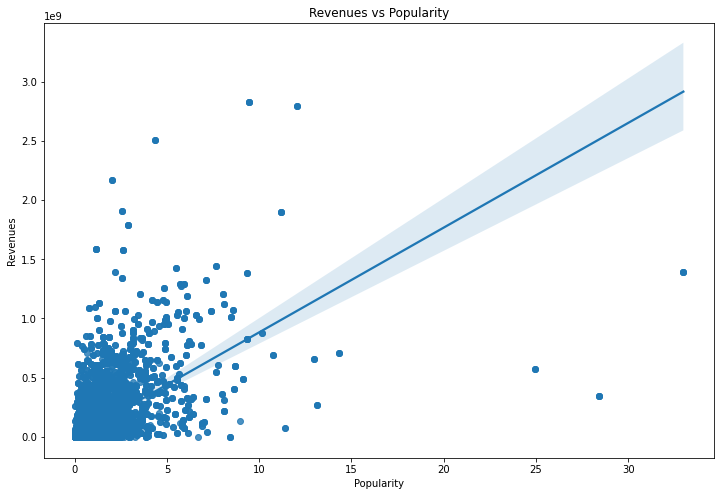

In [116]:
# visualize the correlation between Popularity and revenues
plt.figure(figsize=(12,8))
sns.regplot(x='popularity', y='revenue', data=movie_df)
plt.title("Revenues vs Popularity")
plt.xlabel("Popularity")
plt.ylabel("Revenues")
plt.show()

Correlation between revenues and Popularity is 0.61, which is  strong Positive Correlation.
However from the observation of the scatter plot the revenue increases Popularity upto certain point(where popularity is around 13.


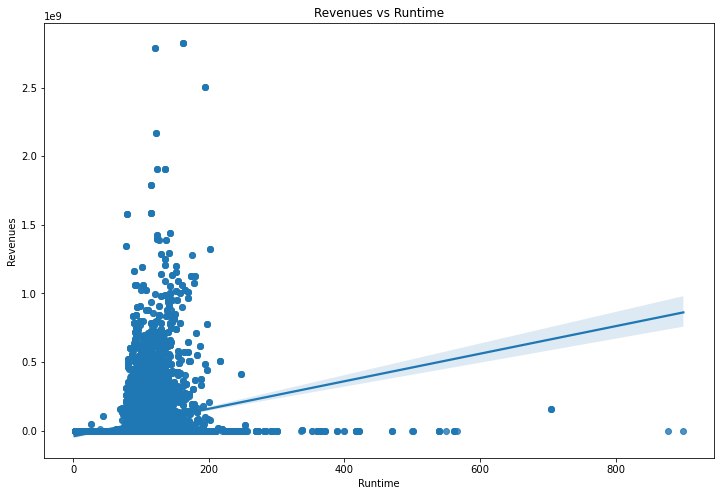

In [117]:
# visualize the correlation between Runtime and revenues
plt.figure(figsize=(12,8))
sns.regplot(x='runtime', y='revenue', data=movie_df)
plt.title("Revenues vs Runtime")
plt.xlabel("Runtime")
plt.ylabel("Revenues")
plt.show()

Correlation between revenues and Runtime is 0.187, which is a Weak Positive Correlation.

The revenue is high when Runtime is between 50 and 200

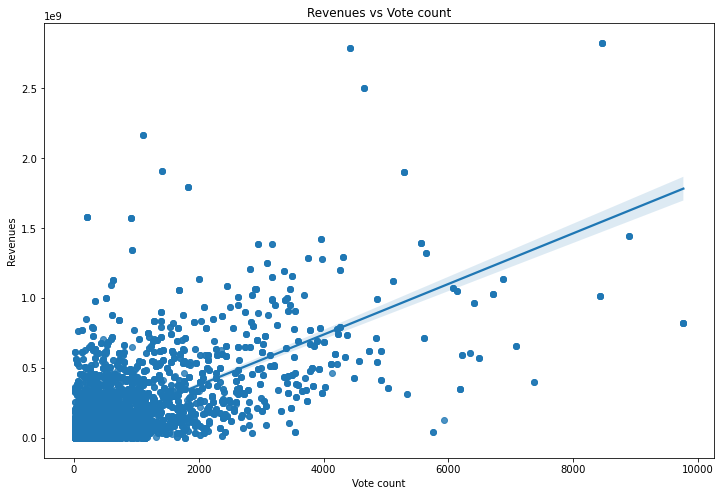

In [118]:
# visualize the correlation between vote count and revenues
plt.figure(figsize=(12,8))
sns.regplot(x='vote_count', y='revenue', data=movie_df)
plt.title("Revenues vs Vote count")
plt.xlabel("Vote count")
plt.ylabel("Revenues")
plt.show()

Correlation between revenues and vote_count is 0.715, which is a strong Positive Correlation.

From the observation of the scatter plot the revenue increases vote_count  

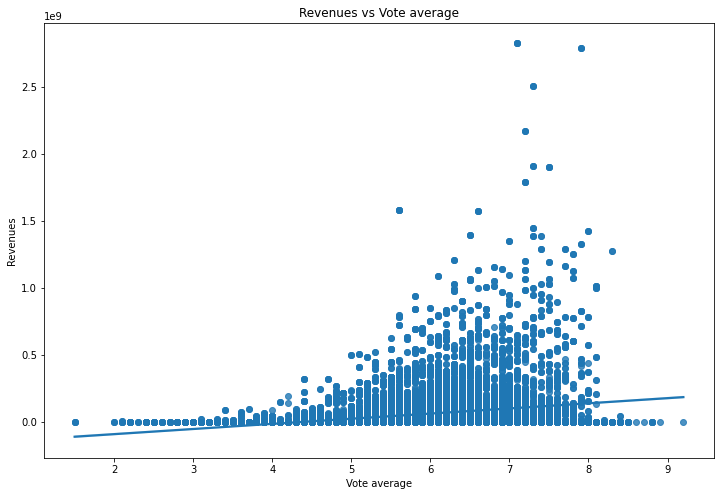

In [119]:
# visualize the correlation between Vote average and revenues
plt.figure(figsize=(12,8))
sns.regplot(x='vote_average', y='revenue', data=movie_df)
plt.title("Revenues vs Vote average")
plt.xlabel("Vote average")
plt.ylabel("Revenues")
plt.show()

Correlation between revenues and vote_average is 0.216, which is Weak Positive Correlation.

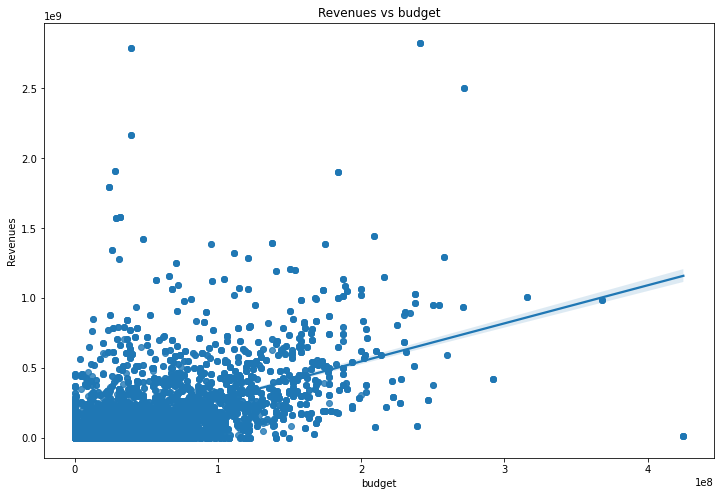

In [113]:
# visualize the correlation between Popularity and revenues
plt.figure(figsize=(12,8))
sns.regplot(x='budget', y='revenue', data=movie_df)
plt.title("Revenues vs budget")
plt.xlabel("budget")
plt.ylabel("Revenues")
plt.show()

Correlation between revenues and budget is 0.643, which is a slightly strong Positive Correlation.

In [122]:
movie_df.groupby("genres").revenue.median().sort_values(ascending=False)

genres
Adventure          1.500831e+07
Crime              3.177156e+06
Action             9.135486e+05
War                5.044519e+04
Romance            1.800000e+04
Mystery            7.722911e+03
Fantasy            6.339774e+01
Music              0.000000e+00
Thriller           0.000000e+00
TV Movie           0.000000e+00
Science Fiction    0.000000e+00
History            0.000000e+00
Horror             0.000000e+00
Foreign            0.000000e+00
Family             0.000000e+00
Drama              0.000000e+00
Documentary        0.000000e+00
Comedy             0.000000e+00
Animation          0.000000e+00
Western            0.000000e+00
Name: revenue, dtype: float64

<AxesSubplot:xlabel='genres'>

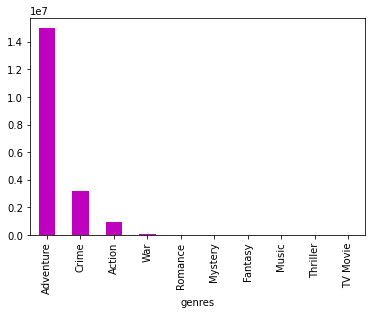

In [127]:
movie_df.groupby("genres").revenue.median().sort_values(ascending=False).head(10).plot.bar(color='m')

The movie genre that contribute the highest revenue is Adventure movies followed by crime

<a id='conclusions'></a>
### Conclusions

so, after processing this data set we can conclude the following :

**The most popular genres over time are adventure and western movies**

**The movies features such  vote_count, Popularity,and budget are strong positively correlated with revenues**

**Adventure contributes the highest revenue is followed by crime** 

### Limitation
There were movies with zero(0) minutes runtime though they were dropped still the challenge was losing  more data 
Also budget and revenue had zero(0) values. Removinng this zero data would have reduced the number of data as well

### Refernces:
 **Github links**
 
    https://github.com/franciskip/Data-Cleaning-and-Data-Wrangling-Preprocessing-
    https://github.com/PacktPublishing/Practical-Data-Wrangling
    https://github.com/franciskip/Business-Success-prediction
    https://github.com/franciskip/Data-Visualiaztion
    
Jiang, S., & Kahn, J. (2020). Data wrangling practices and collaborative interactions with aggregated data. International Journal of Computer-Supported Collaborative Learning, 15(3), 257-281.

Royston, P. (2004). Multiple imputation of missing values. The Stata Journal, 4(3), 227-241.

Chen, C. H., Härdle, W. K., & Unwin, A. (Eds.). (2007). Handbook of data visualization. Springer Science & Business Media.